In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [442]:
url = 'https://www.acea.be/uploads/statistic_documents/PC_90-17_by_country_Enlarged_Europe.xlsx'

In [2]:
os.getcwd()

'C:\\____michal\\WPy64-3720\\notebooks\\old_notebooks'

In [165]:
os.chdir('C:\\____michal\\dtscnc\\automotive')

In [166]:
os.listdir()

['PC_90-17_by_country_Enlarged_Europe.xlsx']

In [167]:
filename = os.listdir()[0]

In [212]:
sheets = pd.read_excel(filename, sheet_name = None)

In [270]:
years = list(sheets.keys()) 
data = pd.read_excel(filename, sheet_name = years[0]) # initial dataframe with the 1990 data
for year in years[1:]: # for all the following years
    df = pd.read_excel(filename, sheet_name = year)
     # add the year to the dataframe merging on the first column
    data = pd.merge(data, df, how = 'outer', on = data.columns[0])


In [271]:
data.shape

(51, 365)

In [272]:
data

,New registrations in European Union and EFTA,Unnamed: 1_x,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,...,Unnamed: 4_y,Unnamed: 5_y,Unnamed: 6_y,Unnamed: 7_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Unnamed: 13_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
2,PC-Passenger Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
4,Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558
5,Denmark,6648,6925,9808,8515,7980,7893,5853,6239,6897,...,17599,22272,23994,15195,15307,14353,18542,18070,16511,221591
6,Finland,17504,9740,16816,15769,12239,14874,10673,9667,9621,...,9394,11058,10862,8846,9673,9103,8745,9665,8068,118529
7,France,234571,191225,222418,191541,196828,151378,228317,178136,138220,...,171871,191416,230926,147518,107449,170645,176492,180005,193372,2110748
8,Germany,226265,234428,325963,290071,299364,272254,295892,251007,237534,...,290697,323952,327693,283080,253679,288035,272855,302636,253950,3441261
9,Greece,10437,6809,4672,13344,12536,9790,11624,10257,6052,...,8452,10666,10141,8421,5134,5947,6306,6523,5428,88115


In [273]:
# use the second row as header

data.columns = data.iloc[1]

In [274]:

data.head()

1,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
2,PC-Passenger Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
4,Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558


In [275]:
# remove the first three rows

data.drop([0,1,2], axis = 0, inplace = True)

In [276]:
data.head()

1,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
3,Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
4,Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558
5,Denmark,6648,6925,9808,8515,7980,7893,5853,6239,6897,...,17599,22272,23994,15195,15307,14353,18542,18070,16511,221591
6,Finland,17504,9740,16816,15769,12239,14874,10673,9667,9621,...,9394,11058,10862,8846,9673,9103,8745,9665,8068,118529
7,France,234571,191225,222418,191541,196828,151378,228317,178136,138220,...,171871,191416,230926,147518,107449,170645,176492,180005,193372,2110748


In [277]:
data.reset_index(inplace = True)

In [278]:
data.head()

1,index,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
0,3,Austria,25877,20780,32661,31991,29744,25876,25884,21055,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
1,4,Belgium,49036,47698,51375,46637,40780,43018,32674,26509,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558
2,5,Denmark,6648,6925,9808,8515,7980,7893,5853,6239,...,17599,22272,23994,15195,15307,14353,18542,18070,16511,221591
3,6,Finland,17504,9740,16816,15769,12239,14874,10673,9667,...,9394,11058,10862,8846,9673,9103,8745,9665,8068,118529
4,7,France,234571,191225,222418,191541,196828,151378,228317,178136,...,171871,191416,230926,147518,107449,170645,176492,180005,193372,2110748


In [279]:
data.drop('index', axis = 1, inplace  = True)

In [280]:
data.head()

1,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
0,Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
1,Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558
2,Denmark,6648,6925,9808,8515,7980,7893,5853,6239,6897,...,17599,22272,23994,15195,15307,14353,18542,18070,16511,221591
3,Finland,17504,9740,16816,15769,12239,14874,10673,9667,9621,...,9394,11058,10862,8846,9673,9103,8745,9665,8068,118529
4,France,234571,191225,222418,191541,196828,151378,228317,178136,138220,...,171871,191416,230926,147518,107449,170645,176492,180005,193372,2110748


In [281]:
# use 'Country' column as index

data.set_index(data['Country'].values, inplace = True)

In [282]:

data.head()

1,Country,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
Austria,Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
Belgium,Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558
Denmark,Denmark,6648,6925,9808,8515,7980,7893,5853,6239,6897,...,17599,22272,23994,15195,15307,14353,18542,18070,16511,221591
Finland,Finland,17504,9740,16816,15769,12239,14874,10673,9667,9621,...,9394,11058,10862,8846,9673,9103,8745,9665,8068,118529
France,France,234571,191225,222418,191541,196828,151378,228317,178136,138220,...,171871,191416,230926,147518,107449,170645,176492,180005,193372,2110748


In [283]:
# remove the 'Country' column
data.drop('Country', axis = 1, inplace = True)

In [284]:
data.head()

1,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,1990-10-01 00:00:00,...,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,23368,...,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,34705,...,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558
Denmark,6648,6925,9808,8515,7980,7893,5853,6239,6897,6182,...,17599,22272,23994,15195,15307,14353,18542,18070,16511,221591
Finland,17504,9740,16816,15769,12239,14874,10673,9667,9621,10307,...,9394,11058,10862,8846,9673,9103,8745,9665,8068,118529
France,234571,191225,222418,191541,196828,151378,228317,178136,138220,221772,...,171871,191416,230926,147518,107449,170645,176492,180005,193372,2110748


In [285]:
list(data.index)


['Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Netherlands',
 'Portugal',
 'Spain',
 'Sweden',
 'United Kingdom',
 'EU-151',
 'Norway',
 'Switzerland',
 'EFTA',
 'EU15 + EFTA',
 "Source: Association Auxiliaire de l'Automobile",
 '1The 15 Member States of the European Union from 1995 until 30.4.2004 (BE, DK, DE, EL, ES, FR, IE, IT, LU, NL, AT, PT, FI, SE, UK)',
 'Iceland',
 'Czech Republic',
 'Estonia',
 'Hungary',
 'Latvia',
 'Lithuania',
 'Poland',
 'Slovakia',
 'Slovenia',
 'EU (New Members)2',
 'EUROPEAN UNION3',
 'EU + EFTA',
 '2Member States having joined the EU since 2004',
 '3The 25 Member States of the European Union from 1.5.2004 to 31.12.2006 (minus Cyprus and Malta: data unavailability)',
 'Bulgaria',
 'Romania',
 '3The 27 Member States of the European Union at 1.1.2007 (minus Cyprus and Malta: data unavailability)',
 'Romania1',
 'EUROPEAN UNION',
 'EU-152',
 'EU-103',
 '1Data for Romania refers to sa

In [286]:
remove_rows = [ 'EU-151', 'EFTA',
 'EU15 + EFTA', "Source: Association Auxiliaire de l'Automobile",
 '1The 15 Member States of the European Union from 1995 until 30.4.2004 (BE, DK, DE, EL, ES, FR, IE, IT, LU, NL, AT, PT, FI, SE, UK)',
  'EU (New Members)2',
 'EUROPEAN UNION3',
 'EU + EFTA',
 '2Member States having joined the EU since 2004',
 '3The 25 Member States of the European Union from 1.5.2004 to 31.12.2006 (minus Cyprus and Malta: data unavailability)',
  '3The 27 Member States of the European Union at 1.1.2007 (minus Cyprus and Malta: data unavailability)',
  'EUROPEAN UNION', 'EU-152', 'EU-103',
 '1Data for Romania refers to sales (APIA). For registrations, see ACAROM figures at www.acea.be',
 '2Member States before the 2004 enlargement',
 '3Member States having joined the EU since 2004 (Cyprus and Malta: data unavailability)',
  'EU-113']

In [287]:
# remove the unnecessary rows

data.drop(remove_rows, axis = 0, inplace = True)

In [288]:
data.index

Index(['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal',
       'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Switzerland', 'Iceland',
       'Czech Republic', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Poland',
       'Slovakia', 'Slovenia', 'Bulgaria', 'Romania', 'Romania1', 'Croatia'],
      dtype='object')

In [289]:
# remove columns with Full Year data

data.drop('FY', axis = 1, inplace = True)

In [291]:
import numpy as np

In [294]:
# check the two Romania rows

data.loc[['Romania', 'Romania1'],:]

1,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,1990-10-01 00:00:00,...,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00
Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6915,6640,8062,8030,11335,12001,10425,10036,9311,6967
Romania1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6915,6640,8062,8030,11335,12001,10425,10036,9311,6967


In [293]:
# replace NaN values in 'Romania' row with 'Romania1' values, to merge the two rows

for column in data.columns:
    if data.loc['Romania', column] is np.nan:
        data.loc['Romania', column] = data.loc['Romania1', column]
         

In [294]:
# inspect the result

data.loc[['Romania', 'Romania1'],:]

1,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,1990-10-01 00:00:00,...,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00
Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6915,6640,8062,8030,11335,12001,10425,10036,9311,6967
Romania1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6915,6640,8062,8030,11335,12001,10425,10036,9311,6967


In [295]:
data.drop('Romania1', axis = 0, inplace = True)

In [296]:
data

1,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,1990-10-01 00:00:00,...,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00
Austria,25877,20780,32661,31991,29744,25876,25884,21055,21013,23368,...,36830,30201,32426,35441,27731,26058,29528,28244,29547,25651
Belgium,49036,47698,51375,46637,40780,43018,32674,26509,40974,34705,...,61066,51132,51342,55119,36627,35517,40895,43500,39645,28072
Denmark,6648,6925,9808,8515,7980,7893,5853,6239,6897,6182,...,22773,17599,22272,23994,15195,15307,14353,18542,18070,16511
Finland,17504,9740,16816,15769,12239,14874,10673,9667,9621,10307,...,11202,9394,11058,10862,8846,9673,9103,8745,9665,8068
France,234571,191225,222418,191541,196828,151378,228317,178136,138220,221772,...,226134,171871,191416,230926,147518,107449,170645,176492,180005,193372
Germany,226265,234428,325963,290071,299364,272254,295892,251007,237534,335700,...,359683,290697,323952,327693,283080,253679,288035,272855,302636,253950
Greece,10437,6809,4672,13344,12536,9790,11624,10257,6052,10700,...,9445,8452,10666,10141,8421,5134,5947,6306,6523,5428
Ireland,11149,8328,8494,9331,10046,7922,7714,6080,4773,4278,...,19893,7843,5993,1401,27710,5733,3898,1946,684,160
Italy,310337,219117,225059,214460,232627,201085,206843,107075,153386,183925,...,226780,160968,204803,188361,145938,83634,167460,158373,156700,121100
Luxembourg,2509,3805,4537,4043,3852,3390,3147,2287,2120,3608,...,5191,4864,5535,5206,4529,3429,3968,4670,4389,2844


In [309]:
# stack the data to convert to long format

data_stacked = data.stack().to_frame().reset_index()

In [327]:
# rename columns

data_stacked.columns = ['Country', 'Date', 'Volumes']

In [328]:
data_stacked.head()

,Country,Date,Volumes
0,Austria,1990-01-01,25877
1,Austria,1990-02-01,20780
2,Austria,1990-03-01,32661
3,Austria,1990-04-01,31991
4,Austria,1990-05-01,29744


In [329]:
data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 3 columns):
Country    7776 non-null category
Date       7776 non-null datetime64[ns]
Volumes    7776 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 100.3 KB


In [316]:
data_stacked['Volumes'] = data_stacked['Volumes'].astype('int')

In [330]:
data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 3 columns):
Country    7776 non-null category
Date       7776 non-null datetime64[ns]
Volumes    7776 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 100.3 KB


In [321]:
data_stacked['Country'] = pd.Categorical(data_stacked['Country'], categories = data_stacked['Country'].unique())

In [331]:
# smaller memory footprint

data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 3 columns):
Country    7776 non-null category
Date       7776 non-null datetime64[ns]
Volumes    7776 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 100.3 KB


In [337]:
some_date = data_stacked.loc[(data_stacked['Country'] == 'Austria') & (data_stacked['Date'] == '1990-01-01'), 'Date']


In [349]:
data_stacked['Date'] = data_stacked['Date'].apply(lambda row: pd.Timestamp(row))

In [351]:
data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 3 columns):
Country    7776 non-null category
Date       7776 non-null datetime64[ns]
Volumes    7776 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 100.3 KB


In [355]:
#group by country and year

data_stacked.groupby(['Country', data_stacked['Date'].apply(lambda s: s.year)]).agg({'Volumes':'sum'})

Volumes
Country  Date         
Austria  1990   288618
         1991   303723
         1992   320034
         1993   285157
         1994   273663
         1995   279610
         1996   307645
         1997   275001
         1998   295865
         1999   314182
         2000   309427
         2001   293528
         2002   279493
         2003   300121
         2004   311292
         2005   307915
         2006   308594
         2007   298182
         2008   293697
         2009   319403
         2010   328563
         2011   356145
         2012   336010
         2013   319035
         2014   303318
         2015   308555
         2016   329604
         2017   353320
Belgium  1990   473506
         1991   462125
...                ...
Slovenia 2017    62532
Bulgaria 2006    32481
         2007    41042
         2008    43758
         2009    24972
         2010    15646
         2011    19252
         2012    20986
         2013    20718
         2014    21186
         2015    24256
         2016    28216
         2017    33809
Romania  2006   256364
         2007   315621
         2008   270995
         2009   130195
         2010   106328
         2011    94619
         2012    72143
         2013    57710
         2014    70172
         2015    81162
         2016    94919
         2017   105083
Croatia  2013    27802
         2014    33962
         2015    35715
         2016    44106
         2017    50770

[648 rows x 1 columns]

In [356]:
#group by year and country

data_stacked.groupby([data_stacked['Date'].apply(lambda s: s.year), 'Country']).agg({'Volumes':'sum'})

Volumes
Date Country                
1990 Austria          288618
     Belgium          473506
     Denmark           80654
     Finland          139095
     France          2309130
     Germany         3349788
     Greece           115480
     Ireland           82584
     Italy           2307055
     Luxembourg        38422
     Netherlands      502627
     Portugal         210924
     Spain            988170
     Sweden           229941
     United Kingdom  2008934
     Norway            61901
     Switzerland      329899
1991 Austria          303723
     Belgium          462125
     Denmark           83685
     Finland           92483
     France          2031274
     Germany         4158674
     Greece           167737
     Ireland           68440
     Italy           2249990
     Luxembourg        43065
     Netherlands      490755
     Portugal         228554
     Spain            886983
...                      ...
2016 Croatia           44106
2017 Austria          353320
     Belgium          546558
     Denmark          221591
     Finland          118529
     France          2110748
     Germany         3441261
     Greece            88115
     Ireland          131356
     Italy           1970497
     Luxembourg        52775
     Netherlands      414538
     Portugal         222134
     Spain           1234931
     Sweden           379393
     United Kingdom  2540617
     Norway           158650
     Switzerland      312155
     Iceland           21325
     Czech Republic   271595
     Estonia           25618
     Hungary          116265
     Latvia            16698
     Lithuania         25836
     Poland           484190
     Slovakia          95976
     Slovenia          62532
     Bulgaria          33809
     Romania          105083
     Croatia           50770

[648 rows x 1 columns]

In [358]:
grp = data_stacked.groupby(['Country', data_stacked['Date'].apply(lambda s: s.year)]).agg({'Volumes':'sum'})

In [389]:
import random

Text(0.5, 1.0, 'car sales in Europe 1990-2017')

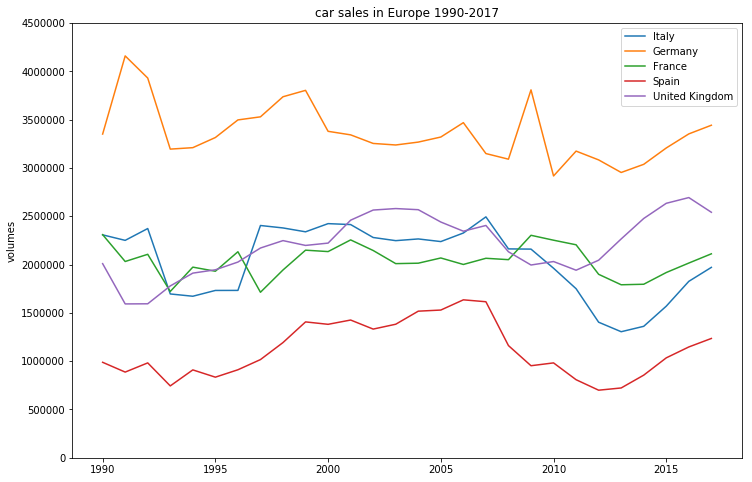

In [398]:
# create a line plot for each market from the list

fig, ax = plt.subplots(figsize = (12,8))
markets = ['Italy', 'Germany', 'France', 'Spain', 'United Kingdom']

for market in markets:
    ax.plot(grp.loc[market]) 
ax.legend(markets)
ax.set_ylim(0, 4500000)
ax.set_ylabel('volumes')
ax.set_title('car sales in Europe 1990-2017')

Text(0.5, 1.0, 'car sales in Europe 1990-2017')

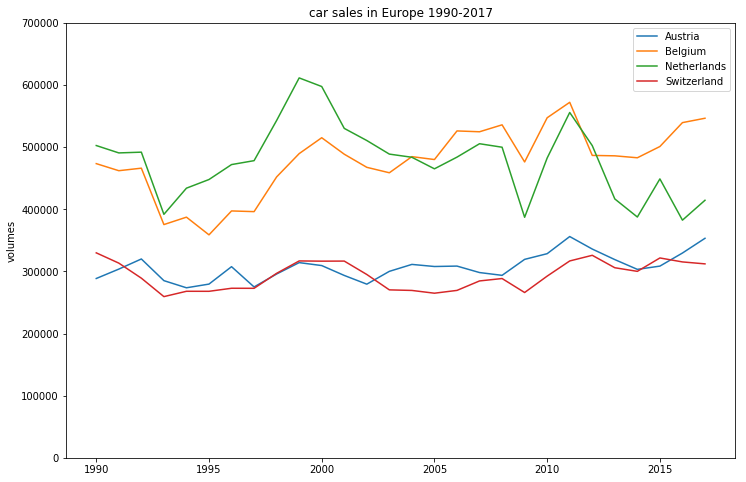

In [401]:
# create a line plot for each market from the list

fig, ax = plt.subplots(figsize = (12,8))
markets = ['Austria', 'Belgium', 'Netherlands', 'Switzerland']

for market in markets:
    ax.plot(grp.loc[market]) 
ax.legend(markets)
ax.set_ylim(0, 700000)
ax.set_ylabel('volumes')
ax.set_title('car sales in Europe 1990-2017')

In [403]:
# is there a seasonal trend?

data_stacked.groupby(data_stacked['Date'].apply(lambda s: s.month)).agg({'Volumes':'mean'})

,Volumes
Date,
1,50459.057099
2,44965.421296
3,66995.680556
4,53416.554012
5,53876.327160
6,56315.831790
7,50793.609568
8,39952.677469
9,52429.535494


In [405]:
grp_month = data_stacked.groupby(['Country', data_stacked['Date'].apply(lambda s: s.month)]).agg({'Volumes':'mean'})

In [414]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

In [420]:
import calendar

Text(0.5, 1.0, 'car sales in Europe 1990-2017')

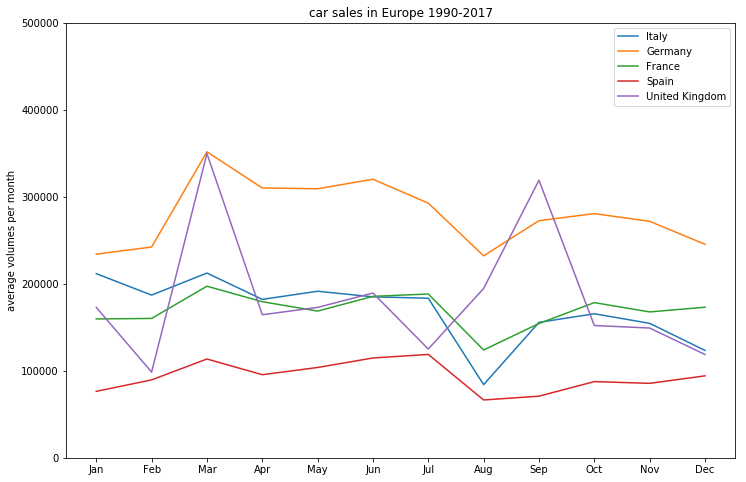

In [434]:
# create a line plot for each market from the list

fig, ax = plt.subplots(figsize = (12,8))
markets = ['Italy', 'Germany', 'France', 'Spain', 'United Kingdom']

for market in markets:
    ax.plot(grp_month.loc[market]) 
ax.legend(markets)
ax.set_ylim(0, 500000)
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(calendar.month_abbr[1:13])
ax.set_ylabel('average volumes per month')
ax.set_title('car sales in Europe 1990-2017')

Text(0.5, 1.0, 'car sales in Europe 1990-2017')

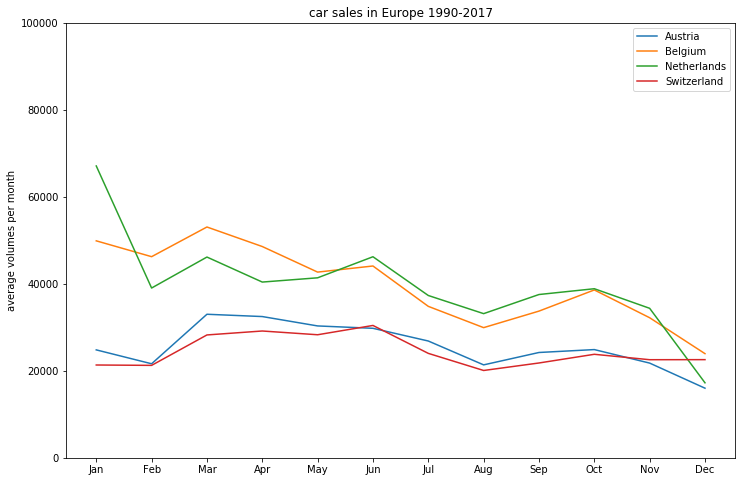

In [436]:
# create a line plot for each market from the list

fig, ax = plt.subplots(figsize = (12,8))
markets = ['Austria', 'Belgium', 'Netherlands', 'Switzerland']

for market in markets:
    ax.plot(grp_month.loc[market]) 
ax.legend(markets)
ax.set_ylim(0, 100000)
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(calendar.month_abbr[1:13])
ax.set_ylabel('average volumes per month')
ax.set_title('car sales in Europe 1990-2017')

Text(0.5, 1.0, 'car sales in Europe 1990-2017')

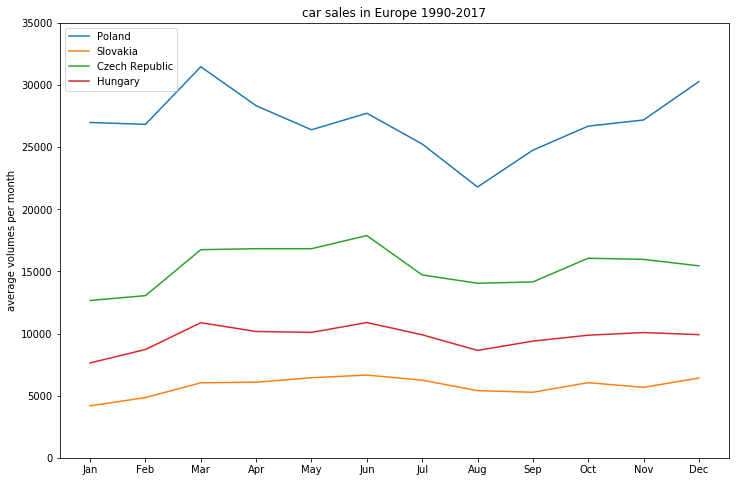

In [439]:
# create a line plot for each market from the list

fig, ax = plt.subplots(figsize = (12,8))
markets = ['Poland', 'Slovakia', 'Czech Republic', 'Hungary']

for market in markets:
    ax.plot(grp_month.loc[market]) 
ax.legend(markets)
ax.set_ylim(0, 35000)
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(calendar.month_abbr[1:13])
ax.set_ylabel('average volumes per month')
ax.set_title('car sales in Europe 1990-2017')